<a href="https://colab.research.google.com/github/mario-i-caicedo-ai/Ondas-y-Optica/blob/main/cuadernos/Dispersi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ondas y Óptica.

## Dispersión

Mario I. Caicedo

El fenómeno de descomposición de la luz blanca  en bandas de colores al atravesar un prisma es una manifestación del fenóneno de **DISPERSIÓN**, objeto de estudio de este cuaderno. 

La relación 

$$\omega=\omega(\vec{k})$$

entre frecuencia y número de onda se conoce como **Relación de Dispersión**

En el caso de la ecuación de ondas 

$$\nabla^2u(\vec{x},t)-\frac{1}{v^2}\frac{\partial^2u(\vec{x},t)}{\partial{}t^2}=0$$

La relación de dispersión es muy simple

$$\omega=v|\vec{k}|$$

En el caso de la ecuación de Schrödinger para partículas libres, 

$$-\frac{\hbar^2}{2m}\nabla^2\Psi(\vec{x},t)=-i\hbar\frac{\partial\Psi(\vec{x},t)}{\partial{}t}$$

La relación de dispersión resulta ser

$$\omega=\hbar\frac{\vec{k}.\vec{k}}{2m}$$


Como ya comentamos, el resultado de la superposición de ondas armónicas monocromáticas de distintas frecuencias y amplitudes es conocido como un paquete de ondas.

Si la velocidad de propagación de todas las *componentes* del paquete es igual, el paquete se propaga sin cambio alguno. Si por el contrario, la velocidad de propagación de las distintas componentes armónicas es diferentes, el paquete sufre cambios notables.

El caso más conocido es el de la luz blanca incidiendo sobre un prisma. En el prisma, el índice de refracción es distinto para cada longitud de onda y por tanto, la velocidad de propagación de las diferentes longitudes de onda es distinta, el efecto visual de la dispersión es notable: la separación de la luz blanca en colores.

La velocidad del paquete como un todo es conocia como *velocidad de grupo* y se calcula como
$$\vec{v}_g=\nabla_{\vec{k}}\omega\,,$$

para la ecuación de ondas, la velocidad de grupo es idéntica a la velocidad de fase, es decir,

$$\vec{v}_g=v\hat{k}$$

En este cuaderno veremos el efecto de la dispersión a través de la animación de la función

$$|\psi(x,t)|^2=\frac{\sqrt{2/\pi}}{\sqrt{1+4t^2}}\,e^{-2\frac{x-k_0t}{1+4t^2}}$$

Esta función está asociada a un paquete de ondas gaussiano que resuelve la ecuación de Schrödinger de una partícula libre de momentum constante $\hbar{}k_0$. Debido a la rlación de dispersión no lineal de la ec. de Schrödinger, las componentes armónicas del paquete viajan a diferentes velocidades y el paquete se dispersa.

Referencias:

* C. Cohen-Tannoudji, Bernard Diu, Frank Laloe. **Quantum Mechanics, Vol**.

* https://en.wikipedia.org/wiki/Wave_packet

----------------------------------------

Bibliotecas

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---------------------------------------------

Preparación del espacio de graficación

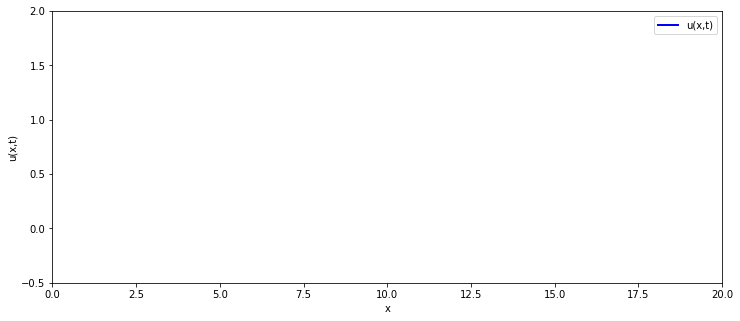

In [ ]:
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,1,1)   

ax1.set_xlim(( 0, 20))            
ax1.set_ylim((-0.5, 2.0))
ax1.set_xlabel('x')
ax1.set_ylabel('u(x,t)')

txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)

ax1.legend(['u(x,t)']);

----------------------------------------------

Onda dispersiva

In [ ]:
def Onda_Dispersiva(x,t):

  N=np.sqrt(2./np.pi)
  factor_display=0.001
  
  ancho=1+factor_display*4*t**2

  fase=x-k_0*t

  Norm=2.*N/np.sqrt(ancho)

  psi_cuadrado=Norm*np.exp(-2*(fase**2)/ancho)

  return psi_cuadrado

  Norm=np.sqrt(3*sigma)*(np.pi**0.25)
  Norm=1/Norm

  s=(t/sigma)**2

  R=Norm*(1-s)*np.exp(-s/2)

  return R

In [ ]:
k_0=float('Introduzca en número de onda (use valores entre 2 y 5) ')

k_0=k_0/10.

In [ ]:
def u(x,t): 
    
    u = Onda_Dispersiva(x,t)
    
    return u

-----------------------------------------

Preámbulo a la animación

In [ ]:
def init():
    line1.set_data([], [])
    return line1,

In [ ]:
def drawframe(n):
    x = np.linspace(0, 20, 1000)
    
    y1 = u(x,n)
    
    line1.set_data(x, y1)
    txt_title.set_text('Onda que viaja hacia la derecha. Cuadro = {0:4d}'.format(n))
    return line1,

Animación

In [ ]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
#anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=20, blit=True)
anim = animation.FuncAnimation(fig, drawframe, frames=200, interval=20, blit=True)

In [ ]:
from IPython.display import HTML
HTML(anim.to_html5_video())